<a href="https://colab.research.google.com/github/Abdallah2014/3MTT-AI-ML/blob/master/Mini_project_multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Predicting House Prices Using Multiple Linear Regression**

**Objective**

Build a regression model to predict house prices based on features like square footage, number of bedrooms, location, etc., using Python.

Dataset

A synthetic dataset generated with sklearn.datasets.make_regression for simplicity.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Generate synthetic data with 4 features (X) and 1 target (y)
X, y = make_regression(
    n_samples=500,  # 500 houses
    n_features=4,   # 4 predictors (e.g., sq. ft., bedrooms, age, location)
    noise=10,       # Add noise to simulate real-world data
    random_state=42
)

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=['SquareFeet', 'Bedrooms', 'HouseAge', 'Location'])
df['Price'] = y  # Target variable

       SquareFeet    Bedrooms    HouseAge    Location       Price
count  500.000000  500.000000  500.000000  500.000000  500.000000
mean     0.038083    0.064711    0.028289    0.049254    3.389091
std      0.997928    1.010731    0.924828    1.020124   52.084087
min     -3.241267   -2.896255   -2.650970   -2.940389 -161.669151
25%     -0.602684   -0.621311   -0.612942   -0.664212  -33.036255
50%      0.031414    0.062632    0.047047    0.047190    5.729128
75%      0.675995    0.699231    0.633819    0.747537   39.737912
max      3.078881    3.852731    2.526932    3.193108  142.722411


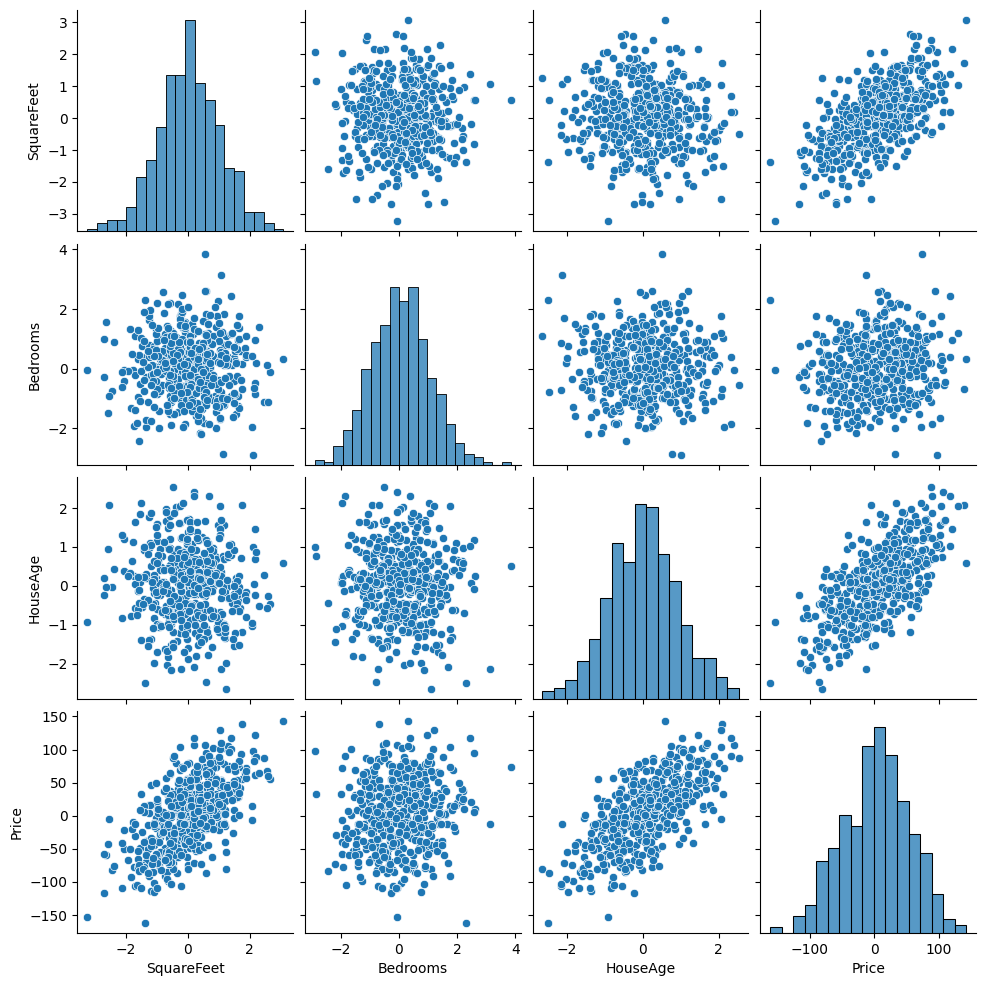

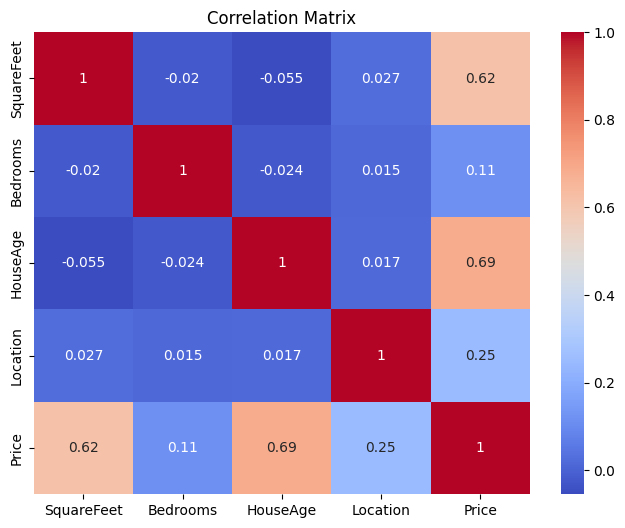

In [3]:
# Display basic statistics
print(df.describe())

# Pairplot to visualize relationships
sns.pairplot(df[['SquareFeet', 'Bedrooms', 'HouseAge', 'Price']])
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [4]:
# Split into features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize features (optional but recommended for interpretation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Print coefficients (feature importance)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
      Feature  Coefficient
0  SquareFeet    33.423395
1    Bedrooms     7.547784
2    HouseAge    37.334115
3    Location    11.359935


In [6]:
# Predict on test data
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 8.21
MSE: 101.23
RMSE: 10.06
R² Score: 0.97


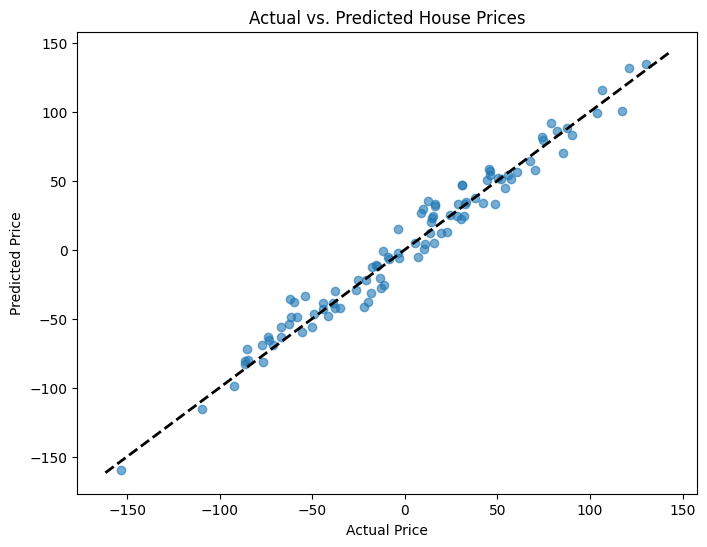

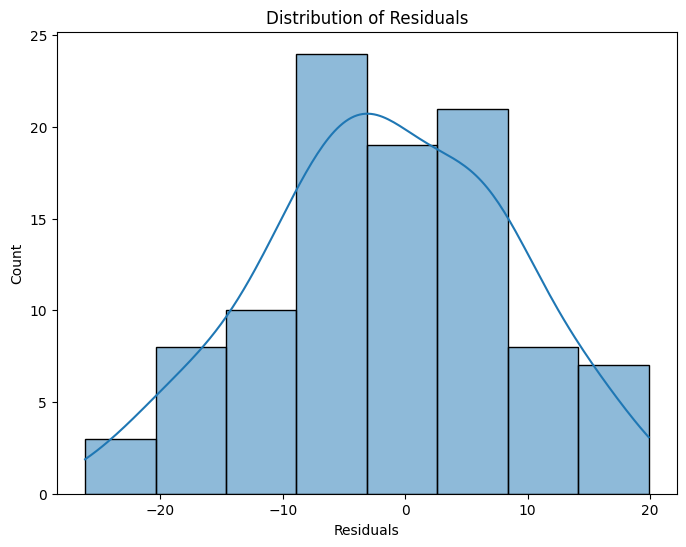

In [7]:
# Actual vs. Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted House Prices')
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()